# Day02 : Linear Regression, Gradient Descent

---

- **Team ID** : 8조 파인알파

- Write and run the code below (including Quiz) in jupyter notebook
- After completion, rename the file, and summit the file to e-class
- Submit file name : **“ML01\_<#조\>.ipynb”**, send me <mkpark@hufs.ac.kr>
  - Ex) ML01\_#조\.ipynb
- Due : **내일 11:59pm**

# 1. Linear regression by gradient descent 

### Sample dataset 
- Task: predicting $ x(size) \rightarrow y(price)$

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# x_train is the vector of input variables (size in 1000 square feet)
# y_train is the vector of target values (price in 1000s of dollars)

x_train = np.array([1.8, 1.3, 1.7, 1.9, 1.4])
y_train = np.array([430., 320., 390., 490., 400.])

print('x_train =', x_train)
print('y_train =', y_train)

x_train = [1.8 1.3 1.7 1.9 1.4]
y_train = [430. 320. 390. 490. 400.]


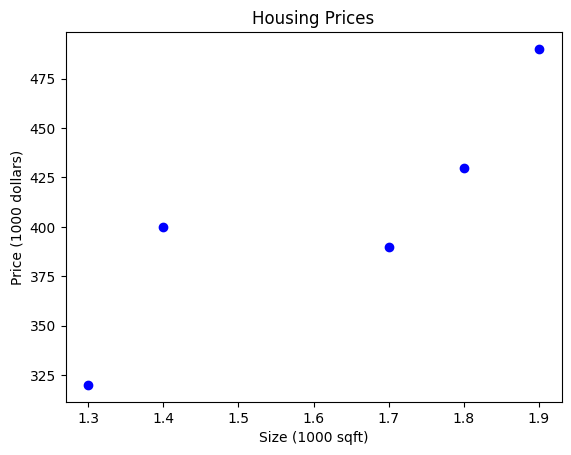

In [5]:
# plot the data points
plt.scatter(x_train, y_train, marker='o', c='blue')

plt.title("Housing Prices")
plt.ylabel('Price (1000 dollars)')
plt.xlabel('Size (1000 sqft)')
plt.show()

### Prediction by a linear model 
- Model : $y = w x + b$

In [36]:
# Computes the prediction of a linear model
# w, b : model parameters  
# x, y : scalar 

def predict(x, w, b):

    # the linear model y = wx + b
    y = np.dot(w, x) + b
        
    return y

In [37]:
# predict with arbitrary model parameter 
w = 100
b = 10

print('size =     ', x_train[0])
print('price =    ', y_train[0])

# predict the y value of first data(x_train[0]) using w and b
y_hat = predict(x_train[0], w, b)

print('predicted =', y_hat)

size =      1.8
price =     430.0
predicted = 190.0


### Cost function 
- Mean Squared Error
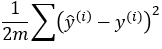

In [12]:
# Computes the cost function - MSE
# x is a vector of training data (ndarray (m,))

def compute_cost(x, y, w, b): 

    # number of training examples
    m = x.shape[0] 
    
    cost = 0   
    for i in range(m): 
        
        # compute the predicted y of each x by the linear model
        y_hat = predict(x[i], w, b)  
        
        # square (predicted y - true y), and add
        cost += (y_hat - y[i]) ** 2
        
    cost = (1 / (2 * m)) * cost  
    return cost

In [13]:
print('w =', w)
print('b =', b)
print('y_train =', y_train)
print('y_hat =  ', predict(x_train, w, b))

# check the cost for the model with w = 100, b = 10
cost = compute_cost(x_train, y_train, w, b)

print('--> cost =', cost)

w = 100
b = 10
y_train = [430. 320. 390. 490. 400.]
y_hat =   [190. 140. 180. 200. 150.]
--> cost = 28070.0


### Computing gradients
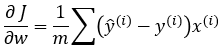
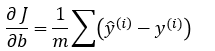

In [14]:
# Compute the gradient for linear regression 
# x is a vector of training data (ndarray (m,))
# dj_dw : The gradient of the cost w.r.t. the parameters w
# dj_db : The gradient of the cost w.r.t. the parameter b     

def compute_gradient(x, y, w, b): 
    
    # Number of training examples
    m = x.shape[0]  
    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        # compute the predicted y 
        y_hat = w * x[i] + b
        
        # compute the gradients
        dj_dw += -(y[i] - y_hat) * x[i]
        dj_db += -(y[i] - y_hat)

    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

In [16]:
# check the gradients for current w, b
print('w =', w)
print('b =', b)
print('x_train =', x_train)
print('y_train =', y_train)

dj_dw, dj_db = compute_gradient(x_train, y_train, w, b)

print('dj_dw =', dj_dw)
print('dj_db =', dj_db)

w = 100
b = 10
x_train = [1.8 1.3 1.7 1.9 1.4]
y_train = [430. 320. 390. 490. 400.]
dj_dw = -384.8
dj_db = -234.0


### Gradient descent
- Repeat 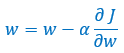

In [17]:
# Performs gradient descent to fit w, b

def gradient_descent(x, y, w, b, alpha, num_iters): 
    """  
    x (ndarray (m,))  : data, m examples 
    y (ndarray (m,))  : target values
    alpha (float)     : learning rate
    num_iters (int)   : number of iterations

    J_history (list)  : History of cost values
    """
    J_history = []
    
    for i in range(num_iters):
        # compute the gradient 
        dj_dw, dj_db = compute_gradient(x, y, w, b)    

        # update Parameters 
        w = w - alpha * dj_dw                          
        b = b - alpha * dj_db                         

        # save cost to J_history list 
        J_history.append(compute_cost(x, y, w, b))

        # print cost every 1000 iteration  
        if (i % 1000) == 0:
            print('Iteration %5d: Cost %0.2e ' % (i, J_history[-1]))
           
    return w, b, J_history 

### Linear regression by gradient descent
- Starting from initial parameters
- Use GD to get the parameters

In [20]:
# initialize parameters
w_init = 0
b_init = 0

# set the hyper parameters, 0.01 and 10000
alpha = 0.01
iterations = 10000

# run gradient descent
w_final, b_final, J_hist = gradient_descent(x_train, y_train, w_init, b_init, alpha, iterations)

# print the learned parameters
print(f"w = {w_final}")
print(f"b = {b_final}")

Iteration     0: Cost 7.79e+04 
Iteration  1000: Cost 3.99e+02 
Iteration  2000: Cost 3.96e+02 
Iteration  3000: Cost 3.93e+02 
Iteration  4000: Cost 3.92e+02 
Iteration  5000: Cost 3.90e+02 
Iteration  6000: Cost 3.90e+02 
Iteration  7000: Cost 3.89e+02 
Iteration  8000: Cost 3.88e+02 
Iteration  9000: Cost 3.88e+02 
w = 201.1031304050341
b = 80.34795484298294


### Plotting cost change 


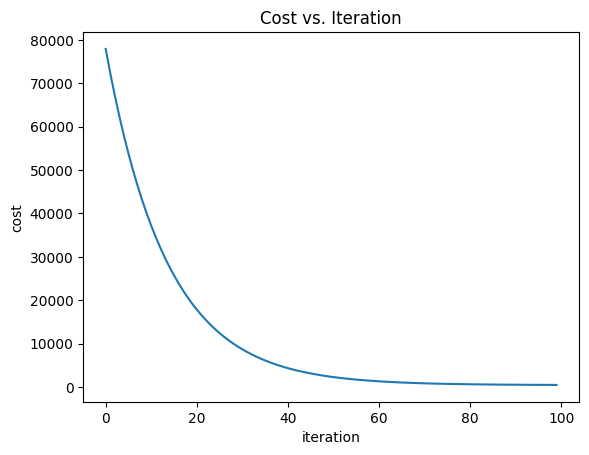

In [21]:
# plot cost during iteration 1 ~ 100 
plt.plot(J_hist[:100])

plt.title("Cost vs. Iteration")
plt.ylabel('cost') 
plt.xlabel('iteration')  
plt.show()

### Plotting the learned model

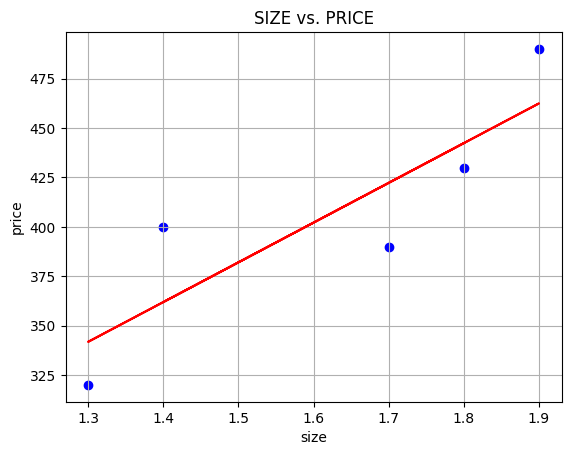

In [22]:
# plot the data points
plt.scatter(x_train, y_train, marker='o', c='blue')

# predict the y value for x_train using learned w and b
y_hat = predict(x_train, w_final, b_final)

# show the model by plotting x_train and y_hat
plt.plot(x_train, y_hat, color='red')  

plt.title('SIZE vs. PRICE') 
plt.xlabel('size') 
plt.ylabel('price') 
plt.grid()
plt.show()

In [23]:
# test price prediction for 1.5 thousand sqft house
size = 1.5
price = predict(size, w_final, b_final)

print('Prediction: %.2f sqft house --> %.2f thousand dollars' % (size*1000, price))

Prediction: 1500.00 sqft house --> 382.00 thousand dollars


---

# 2. Linear Regression by gradient descent - multiple variables, vector form

### Sample dataset 
- Task: predicting $ x_{0}(size), x_{1}(rooms) \rightarrow y(price)$
- Be careful! the name of dataset is X_train, not x_train!

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# X_train is the vector of input variables (size in 1000 square feet, number of rooms)
# y_train is the vector of target values (price in 1000s of dollars)

X_train = np.array([[1.8, 4], [1.3, 3], [1.7, 4], [1.9, 5], [1.4, 3]])
y_train = np.array([430., 320., 390., 490., 400.])

print(X_train)
print(y_train)

[[1.8 4. ]
 [1.3 3. ]
 [1.7 4. ]
 [1.9 5. ]
 [1.4 3. ]]
[430. 320. 390. 490. 400.]


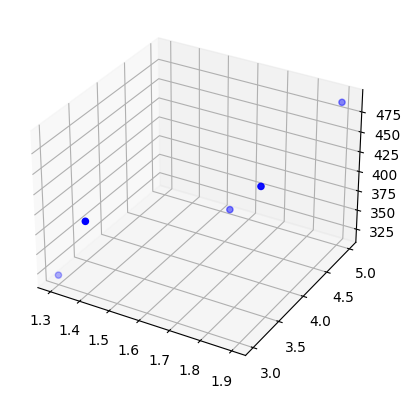

In [25]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# plot the data points in 3D
ax.scatter(X_train[:,0], X_train[:,1], y_train, marker='o', c='blue')
plt.show()

### Prediction by a linear model
- Model : $ y = \mathbf{x \cdot w} + b = w_{0} x_{0} + w_{1} x_{1} + b $ 

In [50]:
# Compute the prediction of a linear model
# x : array (m, n) - m examples with n features
# y : vector (m, ) 
# w : model parameters (n, )
# b : model parameter scalar 

def predict(x, w, b): 

    # the linear model y = wx + b
    y = np.dot(x, w)+ b    
    
    return y

- Prediction - single data
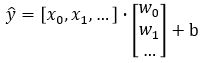


In [51]:
# arbitrary model parameter 
w = np.array([100, 100])
b = 10

# first row from training data
print('X_train[0] =', X_train[0])
print('y_train[0] =', y_train[0])

# predict the y value of first data(X_train[0]) using w and b
y_hat = predict(X_train[0], w, b)

print('y_hat =     ', y_hat)

X_train[0] = [1.8 4. ]
y_train[0] = 430.0
y_hat =      590.0


- Prediction - all data 
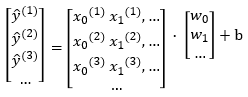
- Vector form 


In [52]:
w = np.array([100, 100])
b = 10

# all training data
print('X_train =', X_train)
print('y_train =', y_train)

# predict the y values of all data(X_train) using w and b
y_hat = predict(X_train, w, b)

print('y_hat =  ', y_hat)

X_train = [[1.8 4. ]
 [1.3 3. ]
 [1.7 4. ]
 [1.9 5. ]
 [1.4 3. ]]
y_train = [430. 320. 390. 490. 400.]
y_hat =   [590. 440. 580. 700. 450.]


### Cost function 
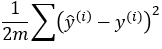
- Vector form 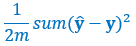

In [53]:
# Computes the cost function - MSE

def compute_cost(X, y, w, b): 
    """
      X (ndarray (m,n)): dataset, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
    """
    # number of training examples and number of features
    m, n = X.shape

    # compute y_hat
    y_hat = np.dot(X, w) + b
    
    # compute the cost
    cost = np.sum((y_hat - y)**2) / (2 * m)

    return cost

In [54]:
print('w =', w)
print('b =', b)
print('y_train =', y_train)
print('y_hat =  ', predict(X_train, w, b))

# check the cost for the model with w = [100, 100], b = 10
cost = compute_cost(X_train, y_train, w, b)

print('--> cost =', cost)

w = [100 100]
b = 10
y_train = [430. 320. 390. 490. 400.]
y_hat =   [590. 440. 580. 700. 450.]
--> cost = 12270.0


### Computing gradients
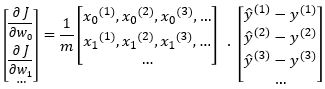
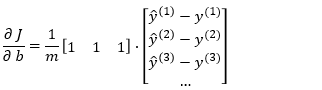
- Vector form 
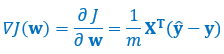
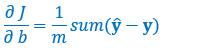

In [55]:
# Computes the gradient for linear regression 

def compute_gradient(X, y, w, b): 
    """
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    # number of training examples and number of features
    m, n = X.shape           
    
    dj_dw = np.zeros((n,))
    dj_db = 0.
    
    # compute y_hat
    y_hat = np.dot(X, w) + b
    err = y_hat - y   
    
    # compute gradients
    dj_dw = np.dot(X.T, err) / m
    dj_db = np.sum(err) / m
       
    return dj_dw, dj_db

In [57]:
# check the gradients for current w, b
print('w =', w)
print('b =', b)
print('X_train =', X_train)
print('y_train =', y_train)

dj_dw, dj_db = compute_gradient(X_train, y_train, w, b)

print('dj_dw =', dj_dw)
print('dj_db =', dj_db)

w = [100 100]
b = 10
X_train = [[1.8 4. ]
 [1.3 3. ]
 [1.7 4. ]
 [1.9 5. ]
 [1.4 3. ]]
y_train = [430. 320. 390. 490. 400.]
dj_dw = [247.2 592. ]
dj_db = 146.0


### Gradient descent
- Repeat 

In [63]:
# Performs gradient descent to fit w, b

def gradient_descent(X, y, w, b, alpha, num_iters): 
    """
      X (ndarray (m,n))   : data, m examples with n features
      y (ndarray (m,))    : target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
      alpha (float)       : learning rate
      num_iters (int)     : number of iterations 
    """
    # a list to store cost J at each iteration
    J_history = []
    
    for i in range(num_iters):

        # compute the gradient 
        dj_dw, dj_db = compute_gradient(X, y, w, b)  

        # update Parameters 
        w = w - alpha * dj_dw            
        b = b - alpha * dj_db             
      
        # save cost to J_history list 
        J_history.append(compute_cost(X, y, w, b))

        # print cost every 1000 iteration
        if (i % 1000) == 0:
            print('Iteration %5d: Cost %0.2e ' % (i, J_history[-1]))
        
    return w, b, J_history

### Linear regression by gradient descent
- Starting from initial parameters
- Use GD to get the parameters

In [64]:
# initialize parameters
w_init = np.zeros(X_train.shape[1])
b_init = 0.

# set the hyperparameters, 0.1 and 10000
alpha = 0.1
iterations = 10000

# run gradient descent
w_final, b_final, J_hist = gradient_descent(X_train, y_train, w_init, b_init, alpha, iterations)

# print the learned parameters
print(f"w = {w_final}")
print(f"b = {b_final}")

Iteration     0: Cost 6.27e+04 
Iteration  1000: Cost 3.76e+02 
Iteration  2000: Cost 3.74e+02 
Iteration  3000: Cost 3.73e+02 
Iteration  4000: Cost 3.73e+02 
Iteration  5000: Cost 3.72e+02 
Iteration  6000: Cost 3.72e+02 
Iteration  7000: Cost 3.72e+02 
Iteration  8000: Cost 3.72e+02 
Iteration  9000: Cost 3.72e+02 
w = [137.51483137  22.57217992]
b = 97.453854092565


### Plotting cost change 

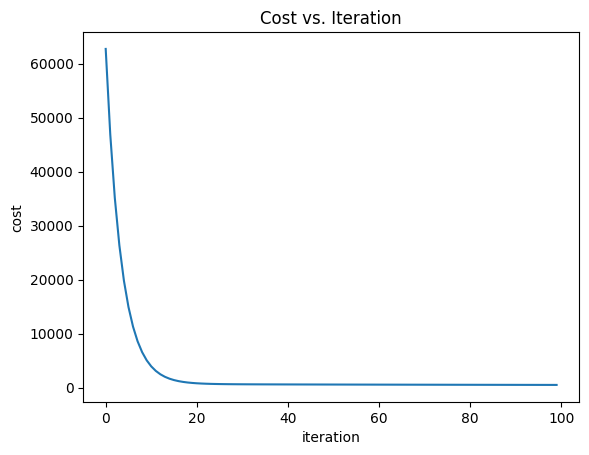

In [65]:
# plot cost during iteration 1 ~ 100 
plt.plot(J_hist[:100])

plt.title("Cost vs. Iteration")
plt.ylabel('cost') 
plt.xlabel('iteration')  
plt.show()

### Plotting the learned model

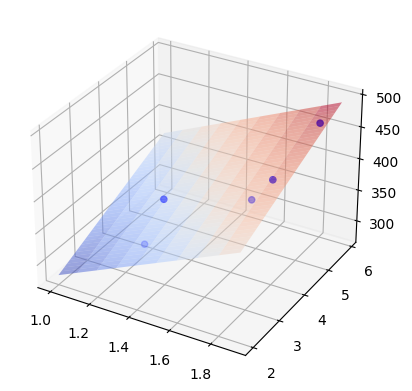

In [67]:
from matplotlib import cm

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# plot the data points
ax.scatter(X_train[:,0], X_train[:,1], y_train, marker='o', c='blue')

# predict the y values for all meshgrid using learned w and b
x0 = np.arange(1, 2, 0.1)
x1 = np.arange(2, 6, 0.1)
x0, x1 = np.meshgrid(x0, x1)
y_hat = w_final[0]*x0 + w_final[1]*x1 + b_final

# show the model by plotting Z surface
ax.plot_surface(x0, x1, y_hat, cmap=cm.coolwarm, alpha=0.5)


plt.show()

In [68]:
from sklearn.metrics import mean_squared_error

# compute y_hat for X_train
y_hat = predict(X_train, w_final, b_final)

# print the mean squared error(MSE) between y and y_hat 
print('MSE : %.2f' % mean_squared_error(y_train, y_hat))    

MSE : 744.62


# 3. Linear Regression using scikit learn 


In [69]:
X_train = np.array([[1.8, 4], [1.3, 3], [1.7, 4], [1.9, 5], [1.4, 3]])
y_train = np.array([430., 320., 390., 490., 400.])

print(X_train)
print(y_train)

[[1.8 4. ]
 [1.3 3. ]
 [1.7 4. ]
 [1.9 5. ]
 [1.4 3. ]]
[430. 320. 390. 490. 400.]


In [72]:
from sklearn.linear_model import LinearRegression

# training the model - use .fit()
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [74]:
# print the learned model parameters
print(f"w = {lr.coef_}")
print(f"b = {lr.intercept_}")

w = [138.46153846  22.30769231]
b = 96.9230769230769


In [75]:
from sklearn.metrics import mean_squared_error

# predict y values for X - use .predict()
y_hat = lr.predict(X_train)

# print the mean squared error(MSE) between y and y_hat 
print('MSE : %.2f' % mean_squared_error(y_train, y_hat))    

MSE : 744.62


# 4. Polynomial Regression and Regularization

In [76]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

def true_fun(X):
    return np.cos(1.5*np.pi * X)

# sample data. 
np.random.seed(0)
n_samples = 20
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

X = X.reshape(-1, 1)
print(X[:3])
print(y[:3])

[[0.0202184 ]
 [0.07103606]
 [0.0871293 ]]
[1.14487249 0.9239768  0.94819339]


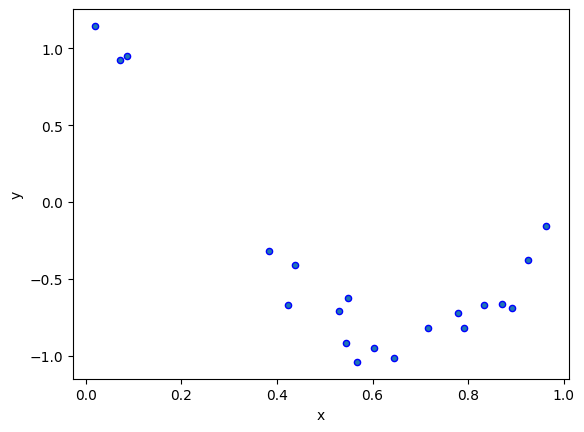

In [77]:
# plot the data points
plt.scatter(X, y, edgecolor="b", s=20)

plt.xlabel("x")
plt.ylabel("y")
plt.show()

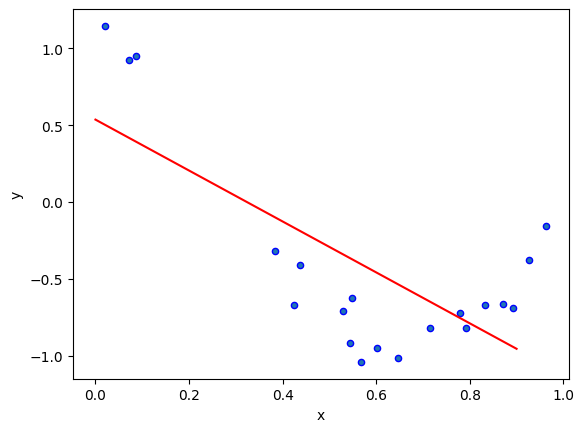

In [89]:
# training the linear regression model with X
lr = LinearRegression()
lr.fit(X, y)

plt.scatter(X, y, edgecolor="b", s=20)

# show the model by plotting x_test and predicted values
X_test = np.arange(0, 1, 0.1).reshape(-1, 1)
pred = lr.predict(X_test)

plt.plot(X_test, pred, color='r')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### Generating polynomial features
- $x \rightarrow x, x^2, x^3, ...$

In [97]:
from sklearn.preprocessing import PolynomialFeatures

# generate polynomial features of X. degree=10 
poly = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly.fit_transform(X)

print(X_poly[:3])

[[2.02183974e-02 4.08783595e-04 8.26494919e-06 1.67104028e-07
  3.37857564e-09 6.83093851e-11 1.38110630e-12 2.79237560e-14
  5.64573598e-16 1.14147734e-17]
 [7.10360582e-02 5.04612156e-03 3.58456585e-04 2.54633428e-05
  1.80881550e-06 1.28491123e-07 9.12750292e-09 6.48381829e-10
  4.60584893e-11 3.27181353e-12]
 [8.71292997e-02 7.59151487e-03 6.61443374e-04 5.76310980e-05
  5.02135721e-06 4.37507337e-07 3.81197079e-08 3.32134345e-09
  2.89386329e-10 2.52140282e-11]]


### Polynomial regression
- $y = w_{0}x^0 + w_{1}x^1 + w_{2}x^2 + ...$
- $cost = ||y - Xw||^2_2  $

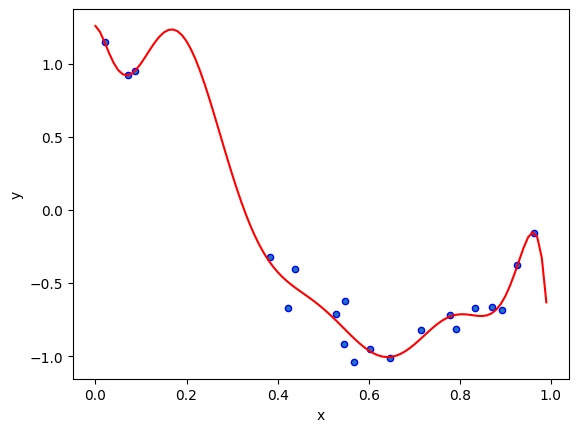

In [101]:
# training the linear regression model with polynomial features of X
lr = LinearRegression()
lr.fit(X_poly, y)

plt.scatter(X, y, edgecolor="b", s=20)

X_test = np.arange(0, 1, 0.01).reshape(-1, 1)
# generate polynomial features of X_test 
X_test_poly = poly.fit_transform(X_test)

# show the model by plotting X_test and predicted values from polynomial features of X_test
pred = lr.predict(X_test_poly)

plt.plot(X_test, pred, color='r')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### Polynomial regression with regularization
- $cost = ||y - Xw||^2_2 + \alpha * ||w||^2_2 $

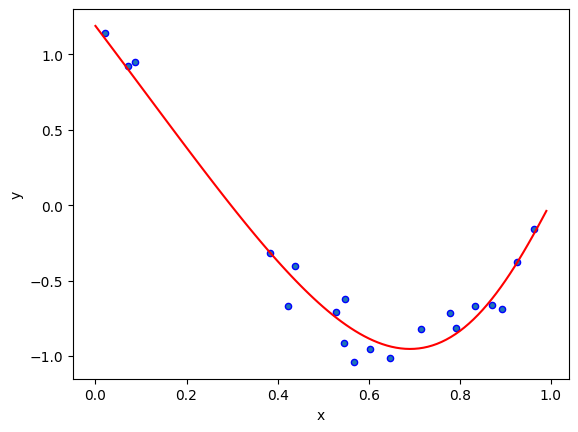

In [102]:
# training the ridge regression model with polynomial features of X
# set regularization parameter alpha = 0.01 
lr = Ridge(alpha=0.01)
lr.fit(X_poly, y)

plt.scatter(X, y, edgecolor="b", s=20)

X_test = np.arange(0, 1, 0.01).reshape(-1, 1)
# generate polynomial features of X_test 
X_test_poly = poly.fit_transform(X_test)

# show the model by plotting X_test and predicted values from polynomial features of X_test
plt.plot(X_test, lr.predict(X_test_poly), color='r')

plt.xlabel("x")
plt.ylabel("y")
plt.show()